## 파이썬에서 텍스트 파일과 엑셀 파일 읽기-pandas

### csv 파일 읽기 -> 구별 CCTV 현황

In [1]:
import pandas as pd

In [2]:
CCTV_seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf8')
CCTV_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


#### 컬럼 확인

In [3]:
CCTV_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_seoul.columns[0]

'기관명'

#### 컬럼 다루기
- rename : 컬럼명 변경
- inplace=True : 실제 CCTV_seoul이라는 변수의 내용 갱신

In [5]:
# 컬럼 이름 바꾸기
CCTV_seoul.rename(columns={CCTV_seoul.columns[0] : '구별'}, inplace=True)
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 엑셀 파일 읽기 -> 구별 인구 현황

In [6]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


#### 엑셀 파일 읽을때 옵션
- header : 몇번째 줄부터 읽을지 정함. 어디를 header로 정할지
- usecols : 어떤 열을 읽을지 정함

In [7]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',
                         header = 2,
                         usecols = 'B, D, G, J, N',
                         encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### pandas 기초 익히기

In [9]:
import numpy as np
import pandas as pd

- pandas의 데이터 유형 중 기초가 되는 것이 Series.
- 대괄호로 만드는 파이썬의 list 데이터로 만들 수 있다.

In [10]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- date_range : 날짜형 데이터. 기본 날짜 지정 후 periods 옵션으로 6일간 이라고 지정

In [11]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- DataFrame 유형의 데이터 만들기.
- 6행 4열의 random 변수, 컬럼에는 ABCD 지정, index 명령으로 index=dates 옵션 이용해 지정

In [12]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,0.897490,0.223211,-0.174755,-0.549866
2013-01-02,1.481777,1.100098,0.855318,0.126550
2013-01-03,0.144797,1.899095,-0.714751,-0.222582
2013-01-04,0.175788,0.818408,-0.350128,-0.067621
2013-01-05,-0.574116,0.536924,0.166923,0.374805
2013-01-06,-0.622951,0.647957,-0.511183,0.454865


- head() : 기본적으로 첫 5행 보여줌

In [13]:
df.head()

,A,B,C,D
2013-01-01,0.897490,0.223211,-0.174755,-0.549866
2013-01-02,1.481777,1.100098,0.855318,0.126550
2013-01-03,0.144797,1.899095,-0.714751,-0.222582
2013-01-04,0.175788,0.818408,-0.350128,-0.067621
2013-01-05,-0.574116,0.536924,0.166923,0.374805


- index, columns 명령을 이용해 pandas의 DataFrame의 컬럼과 인덱스 확인 가능

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- 안에 들어가는 내용은 values로 확인 가능
- info() 명령 사용해 DataFrame의 개요 확인 가능

In [16]:
df.values

array([[ 0.89749044,  0.22321145, -0.17475463, -0.54986602],
       [ 1.48177688,  1.10009795,  0.85531782,  0.12655012],
       [ 0.14479699,  1.89909462, -0.71475135, -0.22258239],
       [ 0.17578803,  0.81840809, -0.35012794, -0.06762093],
       [-0.57411553,  0.53692409,  0.16692256,  0.37480497],
       [-0.62295107,  0.64795709, -0.51118311,  0.45486492]])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- describe() 명령 통해 통계적 개요 확인 가능
- count, mean, min, max, 1/4 지점, 표준편차 확인 가능

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.250464,0.870949,-0.121429,0.019358
std,0.823930,0.581930,0.565025,0.378844
min,-0.622951,0.223211,-0.714751,-0.549866
25%,-0.394387,0.564682,-0.470919,-0.183842
50%,0.160293,0.733183,-0.262441,0.029465
75%,0.717065,1.029675,0.081503,0.312741
max,1.481777,1.899095,0.855318,0.454865


- values가 숫자 아닌 문자라 해도 그에 맞는 개요 나타남

- sort_values 명령은 by로 지정된 컬럼 기준으로 정렬
- ascending 옵션 사용시 내림차순(False), 오름차순(True) 정렬 가능

In [19]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-03,0.144797,1.899095,-0.714751,-0.222582
2013-01-02,1.481777,1.100098,0.855318,0.126550
2013-01-04,0.175788,0.818408,-0.350128,-0.067621
2013-01-06,-0.622951,0.647957,-0.511183,0.454865
2013-01-05,-0.574116,0.536924,0.166923,0.374805
2013-01-01,0.897490,0.223211,-0.174755,-0.549866


- 그냥 변수명 적고 실행시 내용 나타남. 내용 너무 많으면 내용 줄여서 보여줌
- DataFrame으로 선언된 변수의 경우 변수 뒤에 ['컬럼명'] 하면 해당 컬럼만 Series로 보여줌

In [20]:
df['A']

2013-01-01    0.897490
2013-01-02    1.481777
2013-01-03    0.144797
2013-01-04    0.175788
2013-01-05   -0.574116
2013-01-06   -0.622951
Freq: D, Name: A, dtype: float64

- 행을 슬라이스해서도 보여줄 수 있다. 중간부터 보기 가능

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,0.897490,0.223211,-0.174755,-0.549866
2013-01-02,1.481777,1.100098,0.855318,0.126550
2013-01-03,0.144797,1.899095,-0.714751,-0.222582


- 20130102~20130104까지의 행을 보고시다면 인덱스 범위를 넣어줘도 된다

In [22]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.481777,1.100098,0.855318,0.126550
2013-01-03,0.144797,1.899095,-0.714751,-0.222582
2013-01-04,0.175788,0.818408,-0.350128,-0.067621


- 특정 날짜의 데이터만 보고 싶으면 df.loc 명령 사용
- loc = location 옵션. 슬라이싱 할 때 loc 옵션 이용해서 위치 값 지정 가능

In [23]:
print(dates[0])
df.loc[dates[0]]

2013-01-01 00:00:00


A    0.897490
B    0.223211
C   -0.174755
D   -0.549866
Name: 2013-01-01 00:00:00, dtype: float64

- A, B열의 모든 행을 보고 싶으면

In [24]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.897490,0.223211
2013-01-02,1.481777,1.100098
2013-01-03,0.144797,1.899095
2013-01-04,0.175788,0.818408
2013-01-05,-0.574116,0.536924
2013-01-06,-0.622951,0.647957


- 행과 열의 범위 모두 지정 가능

In [25]:
# 20130102~20130104 범위의 데이터 중 A, B 컬럼 데이터만 선택
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.481777,1.100098
2013-01-03,0.144797,1.899095
2013-01-04,0.175788,0.818408


In [26]:
# 20130102의 A, B 컬럼 내용 확인
df.loc['20130102',['A','B']]

A    1.481777
B    1.100098
Name: 2013-01-02 00:00:00, dtype: float64

In [27]:
# dates[0] = 20130101 의 A 컬럼에 있는 데이터만 확인
df.loc[dates[0],'A']

0.8974904410327963

- 행과 열의 번호를 이용해서 데이터에 바로 접근할 때는 iloc 사용
- iloc 사용하면 행이나 열의 범위를 지정하면 된다

In [28]:
# 숫자만 표시하면 행 의미
df.iloc[3]

A    0.175788
B    0.818408
C   -0.350128
D   -0.067621
Name: 2013-01-04 00:00:00, dtype: float64

In [29]:
# 3~4번째까지 행과 0번부터 1번까지의 열의 데이터만 가져오기
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.175788,0.818408
2013-01-05,-0.574116,0.536924


In [30]:
# 범위가 아니라 콤마로 행이나 열을 지정해서 데이터 가져오기
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.481777,0.855318
2013-01-03,0.144797,-0.714751
2013-01-05,-0.574116,0.166923


In [31]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.481777,1.100098,0.855318,0.126550
2013-01-03,0.144797,1.899095,-0.714751,-0.222582


In [32]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.223211,-0.174755
2013-01-02,1.100098,0.855318
2013-01-03,1.899095,-0.714751
2013-01-04,0.818408,-0.350128
2013-01-05,0.536924,0.166923
2013-01-06,0.647957,-0.511183


In [33]:
df

,A,B,C,D
2013-01-01,0.897490,0.223211,-0.174755,-0.549866
2013-01-02,1.481777,1.100098,0.855318,0.126550
2013-01-03,0.144797,1.899095,-0.714751,-0.222582
2013-01-04,0.175788,0.818408,-0.350128,-0.067621
2013-01-05,-0.574116,0.536924,0.166923,0.374805
2013-01-06,-0.622951,0.647957,-0.511183,0.454865


- DataFrame에서는 특정 조건을 만족하는 데이터만 얻을 수 있다.

In [34]:
# 컬럼 A에서 0보다 큰 행만 얻기
# 컬럼 지정시 df['A'] = df.A

df[df.A > 0]

,A,B,C,D
2013-01-01,0.897490,0.223211,-0.174755,-0.549866
2013-01-02,1.481777,1.100098,0.855318,0.126550
2013-01-03,0.144797,1.899095,-0.714751,-0.222582
2013-01-04,0.175788,0.818408,-0.350128,-0.067621


- 데이터 전체에서 조건을 걸면 만족하지 않는 곳은 Nan 처리 됨

In [35]:
df[df > 0]

,A,B,C,D
2013-01-01,0.897490,0.223211,NaN,NaN
2013-01-02,1.481777,1.100098,0.855318,0.126550
2013-01-03,0.144797,1.899095,NaN,NaN
2013-01-04,0.175788,0.818408,NaN,NaN
2013-01-05,NaN,0.536924,0.166923,0.374805
2013-01-06,NaN,0.647957,NaN,0.454865


- DataFrame을 복사할 때 : = 를 이용해 복사하면 데이터 위치만 복사. 원본 데이터는 하나뿐
- 데이터의 내용까지 복사하려면 copy() 옵션 사용

In [36]:
df2 = df.copy()

- 원래 있는 df에 새로운 컬럼 추가

In [37]:
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.897490,0.223211,-0.174755,-0.549866,one
2013-01-02,1.481777,1.100098,0.855318,0.126550,one
2013-01-03,0.144797,1.899095,-0.714751,-0.222582,two
2013-01-04,0.175788,0.818408,-0.350128,-0.067621,three
2013-01-05,-0.574116,0.536924,0.166923,0.374805,four
2013-01-06,-0.622951,0.647957,-0.511183,0.454865,three


- 컬럼 안에 원소 있는지 확인 할때 isin 명령 사용

In [38]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [39]:
# 결과는 True, False로 반환, 조건에 맞는 데이터 선택 가능
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.144797,1.899095,-0.714751,-0.222582,two
2013-01-05,-0.574116,0.536924,0.166923,0.374805,four


- 통계 느낌의 데이터를 볼 때는 apply 이용해 특정 함수 적용시키기
- 누적합 : numpy의 cumsum
- 최대값과 최소값의 차이(거리) : lambda 등

In [40]:
# 누적합
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.897490,0.223211,-0.174755,-0.549866
2013-01-02,2.379267,1.323309,0.680563,-0.423316
2013-01-03,2.524064,3.222404,-0.034188,-0.645898
2013-01-04,2.699852,4.040812,-0.384316,-0.713519
2013-01-05,2.125737,4.577736,-0.217394,-0.338714
2013-01-06,1.502786,5.225693,-0.728577,0.116151


In [41]:
# 최대, 최소 차이
df.apply(lambda x:x.max() - x.min())

A    2.104728
B    1.675883
C    1.570069
D    1.004731
dtype: float64

### pandas 이용해서 CCTV와 인구 현황 데이터 파악하기

#### CCTV 데이터 정리

In [42]:
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [43]:
# 전체 개수인 소계로 정렬하기. 오름차순
CCTV_seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


- CCTV의 전체 개수가 가장 작은 구는 도봉구/마포구/송파구/중량구/동구
- 의문점 : 송파구가 CCTV가 가장 적은 곳 중 하나다. 근데 범죄율이 낮지 않은 곳.

In [44]:
CCTV_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


- CCTV 많은 구는 강남구/양천구/서초구/은평구/용산구

- 2014년~2016년까지 최근 3년간 CCTV 수 더하고 2013년 이전 수로 나눠서 최근 3년간 CCTV 증가율 계산

In [45]:
CCTV_seoul['최근증가율'] = (CCTV_seoul['2016년'] + CCTV_seoul['2015년'] + CCTV_seoul['2014년']) / CCTV_seoul['2013년도 이전'] * 100
CCTV_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


- 최근 3년간 cctv가 많이 증가한 구는 종로구/도봉구/마포구/노원구/강동구

#### 서울시 인구 현황 정리

In [46]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


- 0번 행에 합계가 보인다. 필요없으니까 drop으로 지운다

In [47]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


- 구별 컬럼의 unique 확인

In [48]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

- 제일 끝에 nan이 보인다. 어디에 있는지 확인하기 위해 조건문 사용
- isnull 명령으로 nan 데이터 추출 가능

In [49]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


- 행을 지우는 drop 명령으로 nan이 있던 행 삭제

In [50]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


- 각 구별 전체 인구를 이용해서 구별 '외국인비율'과 '고령자비율' 계산

In [51]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


- 인구수로 정렬. 송파구/강서구/강남구/노원구/관악구 순으로 많음

In [52]:
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [53]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [54]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


- 외국인 숫자가 많은 구 : 영등포구/구로구/금천구/관악구/동대문구 순
- 외국인 비율이 높은 구 : 영등포구/금천구/구로구/중구/용산구 순
- 숫자가 많은 구와 비율이 높은 구가 다르다.

In [55]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [56]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


- 고령자 숫자가 많은 구 : 강서구/송파구/은평구/노원구/관악구 순
- 고령자 비율이 높은 구 : 강북구/종로구/중구/용산구/서대문구 순
- 숫자가 많은 구와 비율이 높은 구가 크게 차이난다.

- 인구 대비 CCTV 현황 같은 내용을 확인하기 위해, 두 데이터를 병합할 필요가 있다!

### pandas 고급 기능 - 두 DataFrame 병합하기

In [57]:
# 연습용 데이터 3개
df1 = pd.DataFrame({'A': ['A0','A1','A2','A3'],
                    'B': ['B0','B1','B2','B3'],
                    'C': ['C0','C1','C2','C3'],
                    'D': ['D0','D1','D2','D3']},
                  index=[0,1,2,3])
df2 = pd.DataFrame({'A': ['A4','A5','A6','A7'],
                    'B': ['B4','B5','B6','B7'],
                    'C': ['C4','C5','C6','C7'],
                    'D': ['D4','D5','D6','D7']},
                  index=[5,6,7,8])
df3 = pd.DataFrame({'A': ['A8','A9','A10','A11'],
                    'B': ['B8','B9','B10','B11'],
                    'C': ['C8','C9','C10','C11'],
                    'D': ['D8','D9','D10','D11']},
                  index=[8,9,10,11])

In [58]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [59]:
df2

,A,B,C,D
5,A4,B4,C4,D4
6,A5,B5,C5,D5
7,A6,B6,C6,D6
8,A7,B7,C7,D7


In [60]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


- 데이터를 단순히 열 방향으로 합치기 : concat

In [61]:
# 아무 옵션 없이 그냥 사용하면 열 방향으로 병합
result = pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
5,A4,B4,C4,D4
6,A5,B5,C5,D5
7,A6,B6,C6,D6
8,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- concat 명령에 keys 옵션으로 구분할 수 있다.
- key 지정된 구분은 다중 index가 되어서 level 형성

In [62]:
result = pd.concat([df1, df2, df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 5    A4   B4   C4   D4
  6    A5   B5   C5   D5
  7    A6   B6   C6   D6
  8    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [63]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('y',  8),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [64]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [65]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 5, 6, 7, 8, 8, 9, 10, 11], dtype='int64')

In [66]:
df4 = pd.DataFrame({'B': ['B2','B3','B6','B7'],
                    'D': ['D2','D3','D6','D7'],
                    'F': ['F2','F3','F6','F7']},
                    index=[2,3,6,7])
result = pd.concat([df1, df4], axis=1)

In [67]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [68]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [69]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


- df1의 index는 0,1,2,3이고, df4의 index가 2,3,6,7인데 concat 명령은 index를 기준으로 데이터를 합쳐서 이렇게 나온다. 그래서 값을 가질 수 없는 곳에는 non이 들어간다.
- 공통된 index로 합치고 공통되지 않은 index의 데이터를 버리도록 하는 옵션은 join='inner'

In [70]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


- reindex(index_df.index) 옵션으로 df1의 인덱스에 맞추도록 할 수 있다.

In [71]:
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


- concat 명령을 사용하는데 열 방향으로 합치면서 ignore_index=True 라고 옵션을 잡으면 두 데이터의 index를 무시하고 합친 후 다시 index를 부여한다. 이때 열을 기준으로 합친다.

In [72]:
result = pd.concat([df1,df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


- 다른 명령 학습하기. 데이터 두개 만들기

In [73]:
left = pd.DataFrame({'key': ['K0','K4','K2','K3'],
                       'A': ['A0','A1','A2','A3'],
                       'B': ['B0','B1','B2','B3']})

right = pd.DataFrame({'key': ['K0','K1','K2','K3'],
                        'C': ['C0','C1','C2','C3'],
                        'D': ['D0','D1','D2','D3']})

In [74]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [75]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


- 두 데이터에 공통으로 있는 컬럼인 key를 기준으로 merge 명령에서 merge 기준을 설정하는 on 옵션으로 합치면 공통된 key에 대해서만 합치게 된다.

In [76]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


- 합치는 두 데이터를 하나씩 기준으로 합칠 수도 있다.
- how 옵션으로 한쪽 데이터를 설정하면 된다.

In [77]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [78]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


- merge한 데이터 결과를 모두 가지는 outer 옵션이 있다.
- 옵션을 사용하면 합집합처럼 merge가 된다. 공통된 요소가 아닌 곳은 nan 처리

In [79]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


- outer의 반대가 inner 옵션. 교집합처럼 공통된 요소만 가진다.

In [80]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


### CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [81]:
data_result = pd.merge(CCTV_seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- 의미 없는 컬럼 지우기
- drop : 행 방향으로 삭제
- del : 열 방향 삭제

In [82]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- set_index : 인덱스 설정하기

In [83]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 상관계수 조사

- 상관 분석(상관관계) : 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법
- 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있다.
- 두 변수간의 관계의 강도를 상관관계라고 한다.
- 상관관계의 절대값이 클수록 두 데이터의 관계가 있다.
- 절대값 0.1 이하면 거의 무시, 0.3 이하면 약한 상관관계, 0.7 이하면 뚜렷한 상관관계

### 다수의 데이터 중 상관계수가 가장 큰 값인 데이터 비교하기

- 상관계수 계산 : numpy의 corrcoef 명령
- 그 결과는 행렬로 나타난다.
- 주 대각선을 기준으로 대칭인 행렬. 대각선 빼고 다른 값을 읽으면 된다.

In [84]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [85]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [86]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

- CCTV 개수와 고령자비율은 약한 음의 상관관계, 외국인 비율과는 큰 의미가 없다. 인구수와의 상관계수가 0.3이어서 약한 상관관계가 있다고 볼 수 있다.

### CCTV와 인구수의 관계 파악하기

In [87]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [88]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- CCTV가 많은 구와 인구수가 많은 구를 시각적으로 비교해보자!

## 파이썬의 대표 시각화 도구 - Matplotlib

- matplotlib의 모듈 중 그래프를 그리는 모듈은 matplotlib.pyplot
- %matplotlib inline은 그래프의 결과를 출력 세션에 나타나게 하는 설정

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

### plot : 선 그래프

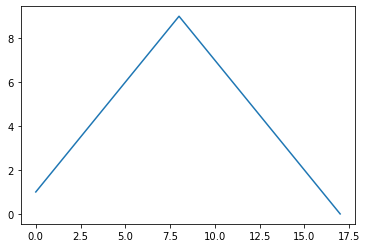

In [90]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

- np.arange 명령은 0부터 12까지 0.01 간격으로 데이터를 만들고 그 리스트를 np.sin에 입력해서 그 출력을 y에 저장한다.

In [93]:
import numpy as np
t = np.arange(0,12,0.01)
y = np.sin(t)

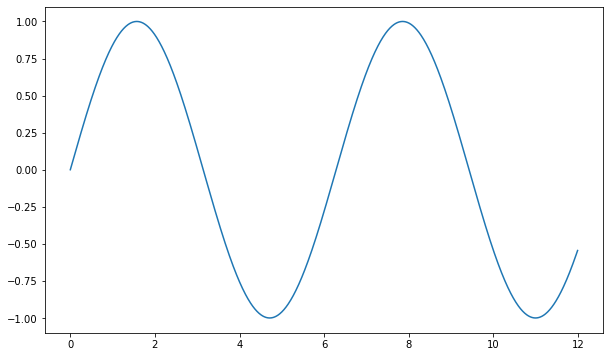

In [94]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.show()

- xlabel : x축 라벨
- ylabel : y축 라벨
- title : 제목 정하기
- grid() : 격자 무늬

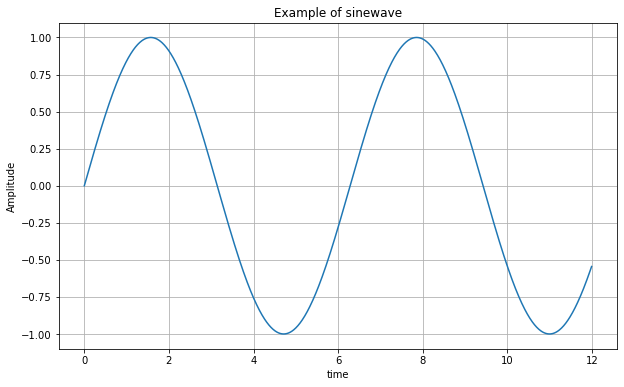

In [95]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

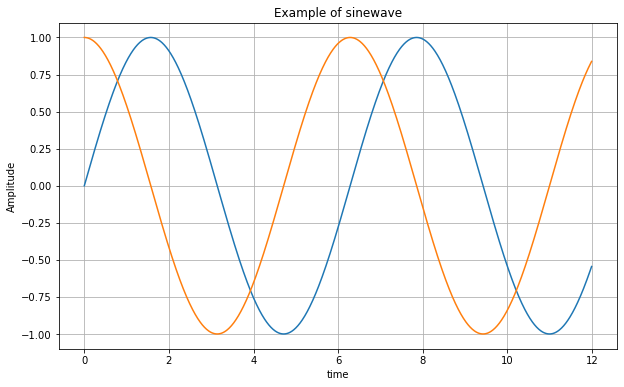

In [101]:
plt.figure(figsize=(10,6)) # 그래프 사이즈 설정
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

- 범례(legend)를 추가 : plt.legend()

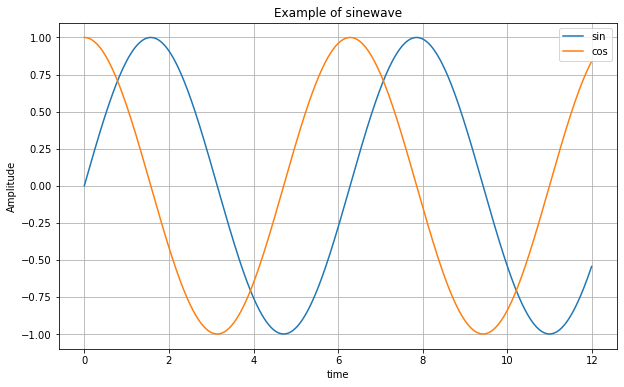

In [103]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

- lw 옵션 : 선의 굵기 지정
- color 옵션 : 색상 지정

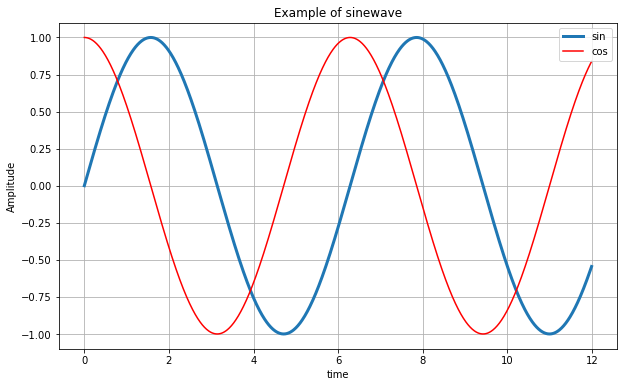

In [104]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

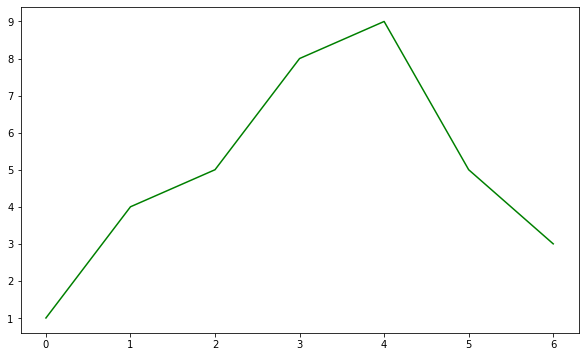

In [107]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

- linestyle='dashed' 등으로 선 스타일을 지정할 수 있다.
- marker 옵션 : 데이터가 존재하는 곳에 마킹할 수 있다.
- markerfacecolor : 마커의 색상 지정
- markersize : 마커의 크기 지정

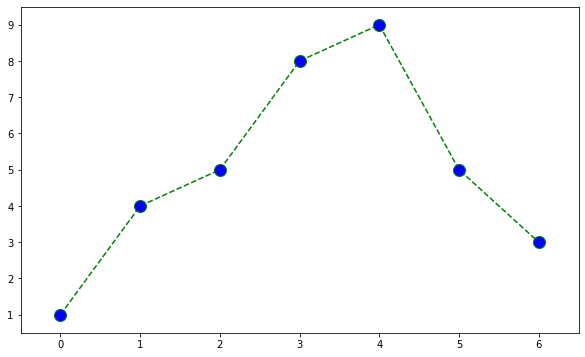

In [113]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=12)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

 ### scatter : 산점도 그래프

In [114]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

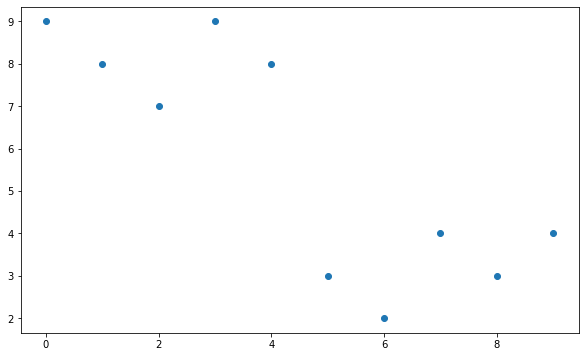

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(t, y)
plt.show()

- marker를 지정할 수 있다

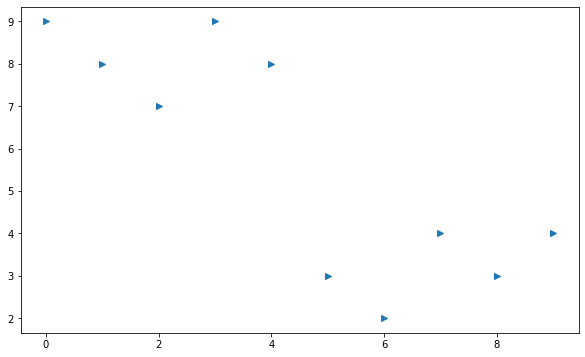

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(t, y, marker='>')
plt.show()

- x축 값인 t에 따라 색상을 바꾸는 color map을 지정할 수 있다. s 옵션은 마커의 크기

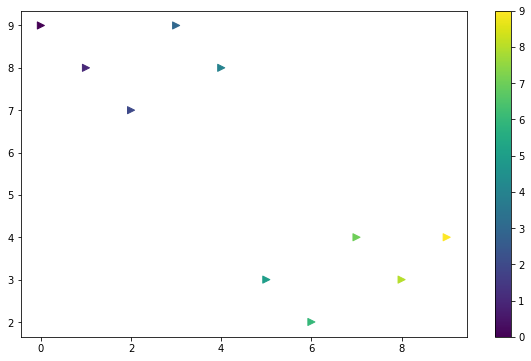

In [117]:
colormap = t
plt.figure(figsize=(10,6))
plt.scatter(t,y, s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()

- numpy의 랜덤변수 함수를 이용해서 데이터 세개 만들기
- loc 옵션으로 평균값과 scale 옵션으로 표준편차를 지정

In [118]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

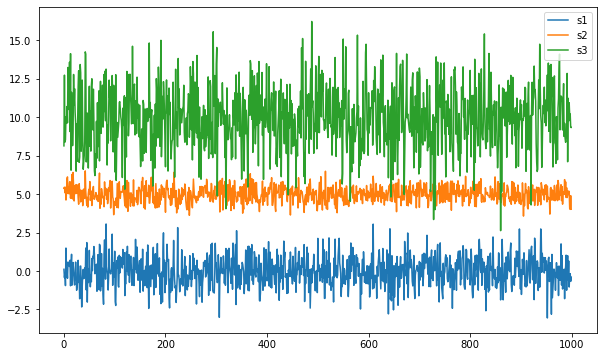

In [119]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

- boxplot으로 표현하기

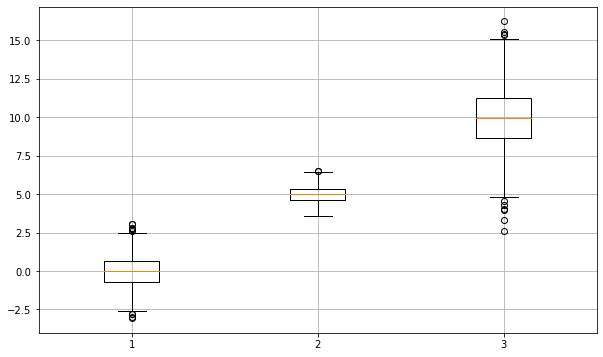

In [120]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

## CCTV 현황 그래프로 분석하기

### matplotlib 폰트 한글로 변경하기

In [123]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

In [124]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### CCTV 데이터 그래프 그리기

- 바 그래프 그리기 : kind='barh'
- grid=Trud : 그리드 그리기

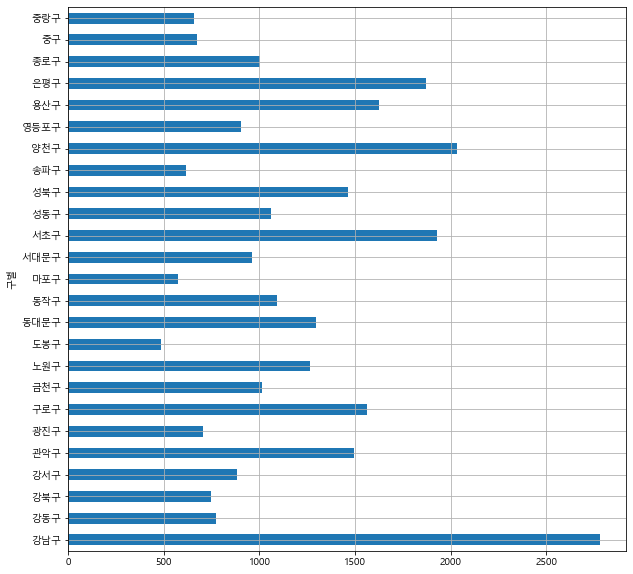

In [125]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

- 데이터 정렬해서 바 그래프 그리기 : .sort_values()

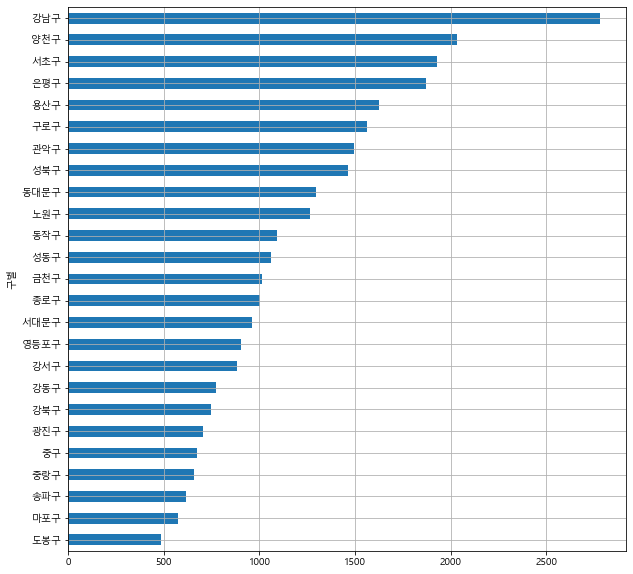

In [126]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

- CCTV 개수에서 강남구가 월등하다.
- 양천구, 서초구, 은평구에 CCTV 많이 설치됐다.
- 하위 그룹은 적은 수의 CCTV를 가지고 있다.

### 인구 대비 CCTV 비율 그래프 그리기

#### 막대그래프로 그리기

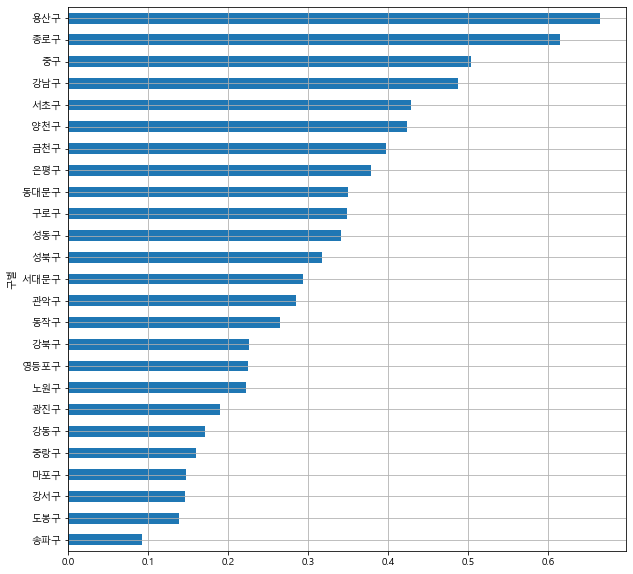

In [128]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

- 인구 대비 CCTV 수는 용산구와 종로구가 월등히 높다.
- 송파구는 인구 대비 CCTV 비율이 낮다.

#### 산점도 함수로 그리기

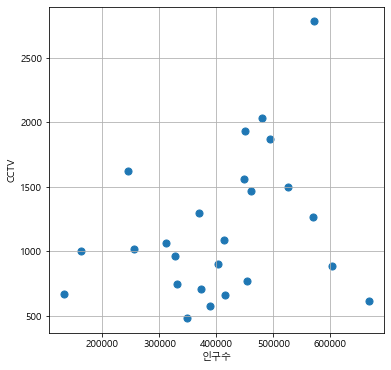

In [129]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

#### 관계 그래프 : 선형

- 데이터를 대표하는 직선을 하나 그리자! : numpy의 polyfit 명령으로 가능
- x축 데이터는 numpy의 linspace, y축은 poly1d로 만들 수 있다

In [130]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [131]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

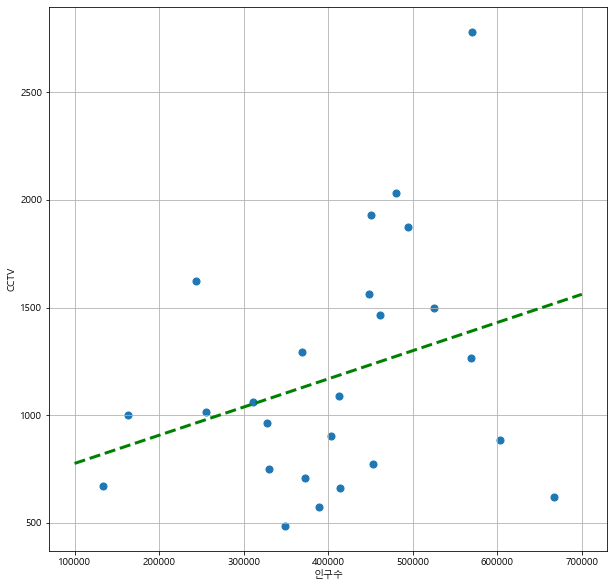

In [132]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

#### 특이치를 다른 색으로 표현하기

 - 오차 계산하기
 - 오차가 큰 순으로 데이터를 정렬해서 다시 저장

In [133]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# np.abs 절대값 함수
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


- 텍스트와 color map 입히기

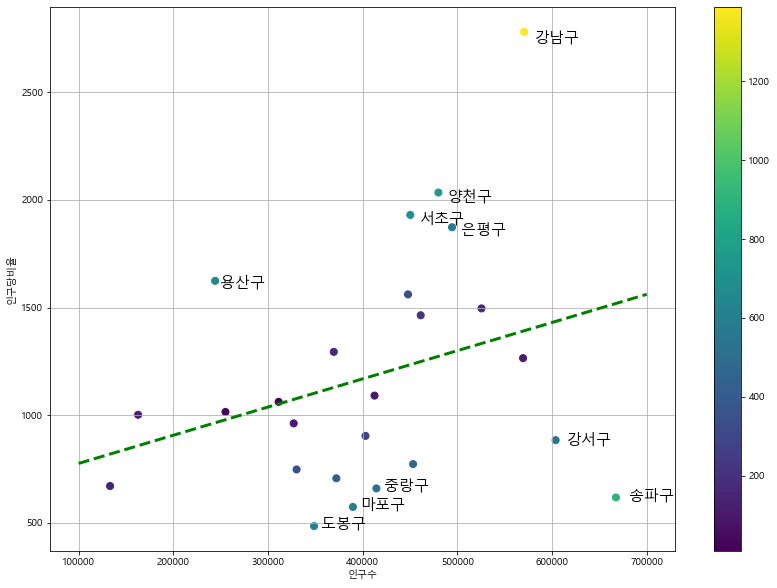

In [134]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, # x좌표
             df_sort['소계'][n]*0.98, # y좌표. 오차가 큰 10개
             df_sort.index[n], fontsize=15) # 출력할 내용, 폰트사이즈
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

- 추세선 위로는 CCTV가 많이 설치된 지역, 밑으로는 적게 설치된 지역